# Stock Market Analysis

## Business Problem

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
warnings.filterwarnings('ignore')

## Functions

In [2]:
def adfuller_of(series):
    """Prints the Augmented Dickey-Fuller test results."""
    
    adf, pvalue, usedlag, nobs, crit_vals, resstore = adfuller(series)
    print(f'''
                          ADF: {adf}
                      P-Value: {pvalue}
                     Used Lag: {usedlag}
       Number of Observations: {nobs}
    Critical Values (for ADF): {crit_vals}
                  ResultStore: {resstore}
    ''')

In [3]:
def get_data(stock):
    start = datetime.datetime(2016,1,1)
    end = datetime.datetime(2021,6,1)
    stock_df = web.DataReader(stock, 'yahoo', start, end)
    stock_df['Stock'] = stock
    stock_df['Returns'] = stock_df['Close'].pct_change(1)
    stock_df['Cumulative Return'] = (1 + stock_df['Returns']).cumprod()
    return stock_df

## Load Data

In [4]:
#tesla = web.DataReader('TSLA', 'yahoo', start, end)

### Top 10 Tech Stocks

In [5]:
apple = get_data('AAPL')

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1362 entries, 2016-01-04 to 2021-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               1362 non-null   float64
 1   Low                1362 non-null   float64
 2   Open               1362 non-null   float64
 3   Close              1362 non-null   float64
 4   Volume             1362 non-null   float64
 5   Adj Close          1362 non-null   float64
 6   Stock              1362 non-null   object 
 7   Returns            1361 non-null   float64
 8   Cumulative Return  1361 non-null   float64
dtypes: float64(8), object(1)
memory usage: 106.4+ KB


In [7]:
microsoft = get_data('MSFT')

In [8]:
google = get_data('GOOG')

In [9]:
amazon = get_data('AMZN')

In [10]:
facebook = get_data('FB')

In [11]:
tencent = get_data('TCEHY')

In [12]:
alibaba = get_data('BABA')

In [13]:
tesla = get_data('TSLA')

In [14]:
tsmc = get_data('TSM')

In [15]:
nvidia = get_data('NVDA')

In [16]:
to_concat = [apple, microsoft, google, amazon, facebook, tencent, alibaba, tesla, tsmc, nvidia]
tech_df = pd.concat(to_concat)

In [17]:
tech_df.shape

(13620, 9)

In [18]:
tech_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13620 entries, 2016-01-04 to 2021-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               13620 non-null  float64
 1   Low                13620 non-null  float64
 2   Open               13620 non-null  float64
 3   Close              13620 non-null  float64
 4   Volume             13620 non-null  float64
 5   Adj Close          13620 non-null  float64
 6   Stock              13620 non-null  object 
 7   Returns            13610 non-null  float64
 8   Cumulative Return  13610 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [19]:
aapl_df = tech_df[tech_df['Stock'] == 'AAPL']
aapl_df.shape

(1362, 9)

In [20]:
aapl_df.iloc[-1]

High                      125.35
Low                       123.94
Open                      125.08
Close                     124.28
Volume               6.76371e+07
Adj Close                 124.28
Stock                       AAPL
Returns              -0.00264828
Cumulative Return        4.71875
Name: 2021-06-01 00:00:00, dtype: object

In [21]:
msft_df = tech_df[tech_df['Stock'] == 'MSFT']
msft_df.shape

(1362, 9)

### Top 10 Healthcare Stocks

In [22]:
united_health = get_data('UNH')

In [23]:
cvs = get_data('CVS')

In [24]:
hca = get_data('HCA')

In [25]:
mckesson = get_data('MCK')

In [26]:
amerisource_bergen = get_data('ABC')

In [27]:
cerner = get_data('CERN')

In [28]:
teladoc_health = get_data('TDOC')

In [29]:
bio_rad = get_data('BIO')

In [30]:
cardinal_health = get_data('CAH')

In [31]:
perkin_elmer = get_data('PKI')

In [32]:
to_concat = [united_health, cvs, hca, mckesson, amerisource_bergen, cerner, teladoc_health,
            bio_rad, cardinal_health, perkin_elmer]
healthcare_df = pd.concat(to_concat)

In [33]:
healthcare_df.shape

(13620, 9)

In [34]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13620 entries, 2016-01-04 to 2021-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               13620 non-null  float64
 1   Low                13620 non-null  float64
 2   Open               13620 non-null  float64
 3   Close              13620 non-null  float64
 4   Volume             13620 non-null  float64
 5   Adj Close          13620 non-null  float64
 6   Stock              13620 non-null  object 
 7   Returns            13610 non-null  float64
 8   Cumulative Return  13610 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


### Top 5 Cryptocurrency Stocks

In [35]:
bitcoin = get_data('BTC-USD')

In [36]:
ethereum = get_data('ETH-USD')

In [37]:
#binance_coin = get_data('BNB-USD')

In [38]:
#cardano = get_data('ADA-USD')

In [39]:
dogecoin = get_data('DOGE-USD')

In [40]:
xrp = get_data('XRP-USD')

In [41]:
litecoin = get_data('LTC-USD')

In [42]:
#stellar = get_data('XLM-USD')

In [43]:
to_concat = [bitcoin, ethereum, dogecoin, xrp, litecoin]
crypto_df = pd.concat(to_concat)

In [44]:
crypto_df.shape

(9880, 9)

In [45]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9880 entries, 2016-01-01 to 2021-06-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               9880 non-null   float64
 1   Low                9880 non-null   float64
 2   Open               9880 non-null   float64
 3   Close              9880 non-null   float64
 4   Volume             9880 non-null   float64
 5   Adj Close          9880 non-null   float64
 6   Stock              9880 non-null   object 
 7   Returns            9875 non-null   float64
 8   Cumulative Return  9875 non-null   float64
dtypes: float64(8), object(1)
memory usage: 771.9+ KB


## Data Exploration

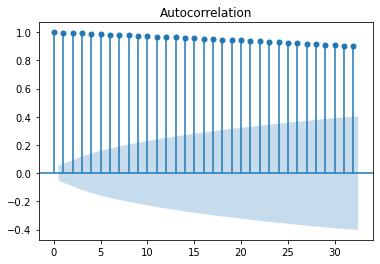

In [46]:
plot_acf(apple['Close']);

In [47]:
decomposition = seasonal_decompose(apple['Close'], period=365)

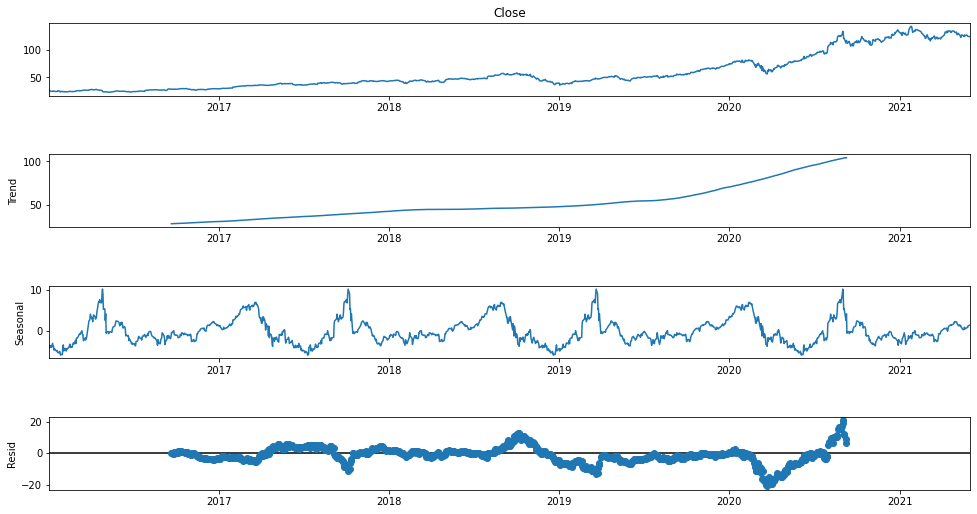

In [48]:
fig = decomposition.plot()
fig.set_size_inches(15,8)

In [49]:
#tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()

In [50]:
tech_df.head()

,High,Low,Open,Close,Volume,Adj Close,Stock,Returns,Cumulative Return
Date,,,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.323219,AAPL,NaN,NaN
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.713696,AAPL,-0.025059,0.974941
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.249626,AAPL,-0.019570,0.955861
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.268383,AAPL,-0.042205,0.915520
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.386133,AAPL,0.005288,0.920361


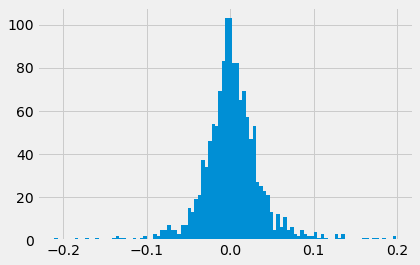

In [51]:
plt.style.use('fivethirtyeight')
tesla['Returns'].hist(bins=100);

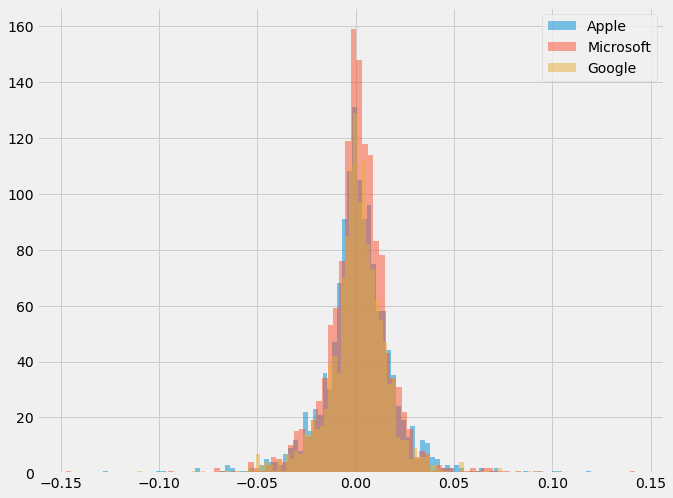

In [52]:
apple['Returns'].hist(bins=100, label='Apple', figsize=(10,8), alpha=0.5)
microsoft['Returns'].hist(bins=100, label='Microsoft', figsize=(10,8), alpha=0.5)
google['Returns'].hist(bins=100, label='Google', figsize=(10,8), alpha=0.5)
plt.legend();

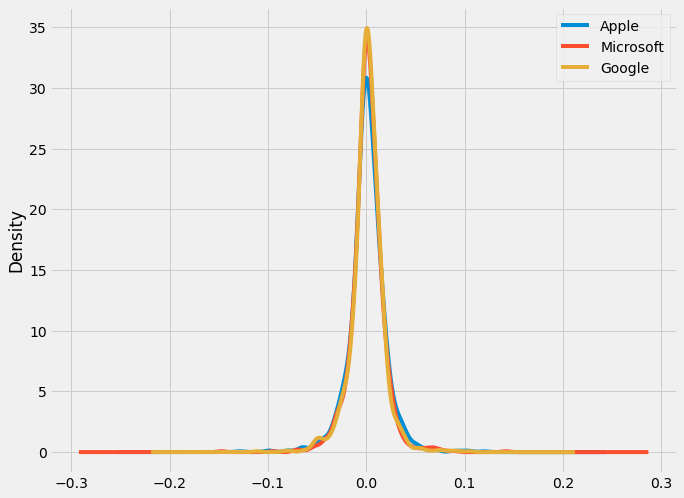

In [53]:
apple['Returns'].plot(kind='kde', label='Apple', figsize=(10,8))
microsoft['Returns'].plot(kind='kde', label='Microsoft', figsize=(10,8))
google['Returns'].plot(kind='kde', label='Google', figsize=(10,8))
plt.legend();

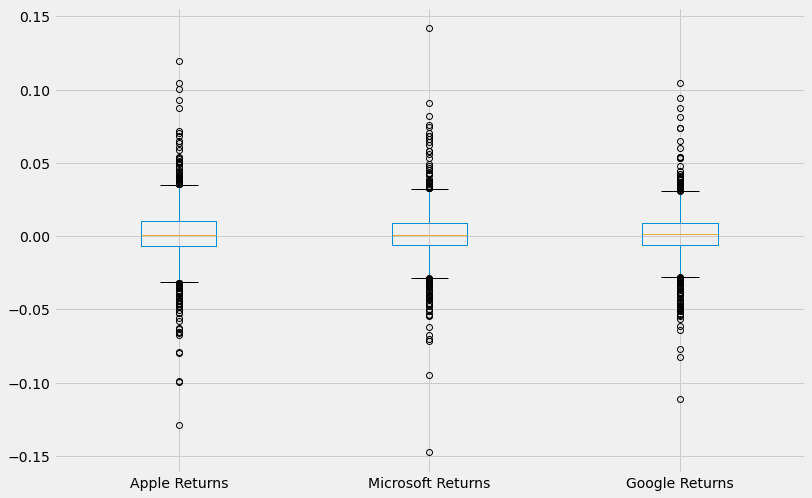

In [54]:
box_df = pd.concat([apple['Returns'], microsoft['Returns'], google['Returns']], axis=1)
box_df.columns = ['Apple Returns', 'Microsoft Returns', 'Google Returns']
box_df.plot(kind='box', figsize=(12,8));

In [55]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Stock,Returns,Cumulative Return
Date,,,,,,,,,
2021-05-25,613.989990,595.710022,607.309998,604.690002,28005900.0,604.690002,TSLA,-0.002886,13.533190
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300.0,619.130005,TSLA,0.023880,13.856363
2021-05-27,631.130005,616.210022,620.239990,630.849976,26370600.0,630.849976,TSLA,0.018930,14.118660
2021-05-28,635.590027,622.380005,628.500000,625.219971,22737000.0,625.219971,TSLA,-0.008924,13.992659
2021-06-01,633.799988,620.549988,627.799988,623.900024,18084900.0,623.900024,TSLA,-0.002111,13.963118


In [56]:
#tesla.iloc[-1,-1]

In [57]:
def returns_dict(df):
    """Takes in a"""
    returns_lst = []
    for s in df.Stock.unique():
        stock_df = df[(df['Stock'] == s)]
        ret = stock_df.iloc[-1,8]
        returns_lst.append(round(ret,2)) 
        
    stock_names = []
    for n in df.Stock.unique():
        stock_names.append(n)
    
    returns_dict = dict(zip(stock_names, returns_lst))
    return(returns_dict)

In [58]:
returns_dict(tech_df)

{'AAPL': 4.72,
 'MSFT': 4.51,
 'GOOG': 3.28,
 'AMZN': 5.05,
 'FB': 3.22,
 'TCEHY': 4.25,
 'BABA': 2.86,
 'TSLA': 13.96,
 'TSM': 5.36,
 'NVDA': 20.1}

In [59]:
returns_dict(crypto_df)

{'BTC-USD': 86.51,
 'ETH-USD': 2854.49,
 'DOGE-USD': 2749.18,
 'XRP-USD': 172.02,
 'LTC-USD': 53.37}

In [60]:
health_returns = returns_dict(healthcare_df)

In [61]:
health_df = pd.DataFrame(list(health_returns.items()),columns = ['Stock','Cumulative Return']) 
health_df.sort_values(by='Cumulative Return', ascending=False).reset_index(drop=True)

,Stock,Cumulative Return
0,TDOC,8.47
1,BIO,4.27
2,UNH,3.49
3,HCA,3.26
4,PKI,2.70
5,CERN,1.34
6,ABC,1.12
7,MCK,0.99
8,CVS,0.89
9,CAH,0.63


Text(0.5, 0, 'Cumulative Return %')

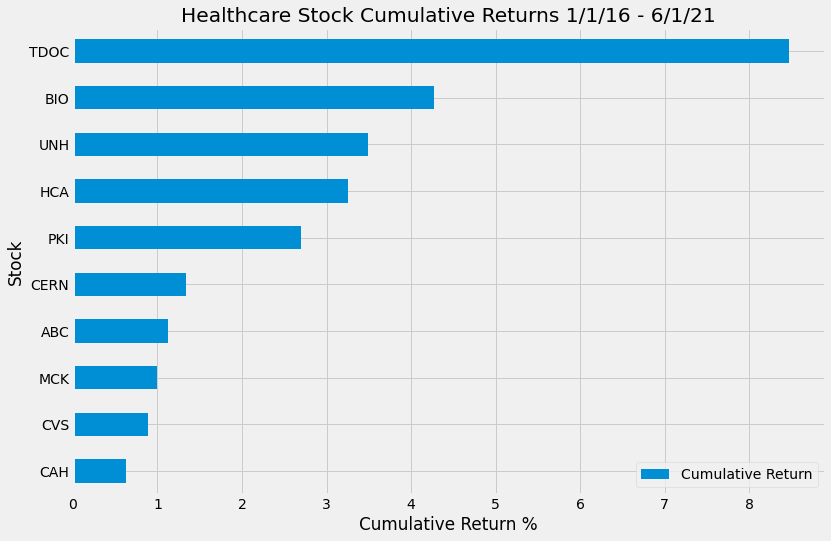

In [62]:
ax = health_df.sort_values('Cumulative Return').plot.barh(x='Stock', figsize=(12,8))
plt.title('Healthcare Stock Cumulative Returns 1/1/16 - 6/1/21')
plt.xlabel('Cumulative Return %')

In [63]:
def get_roi_dict(df):
    """Takes in a"""
    roi_lst = []
    for s in df.Stock.unique():
        stock_df = df[(df['Stock'] == s)]
        #resampled_df = county_df.resample(rule='A').mean()
        cost = stock_df.iloc[0,3]
        value = stock_df.iloc[-1,3]
        ROI = (value-cost)/cost
        roi_lst.append(round(ROI,2))
    stock_names = []
    for n in tech_df.Stock.unique():
        stock_names.append(n)
        
    roi_dict = dict(zip(roi_lst, stock_names))
    return(roi_dict)

In [64]:
get_roi_dict(tech_df)

{3.72: 'AAPL',
 3.51: 'MSFT',
 2.28: 'GOOG',
 4.05: 'AMZN',
 2.22: 'FB',
 3.25: 'TCEHY',
 1.86: 'BABA',
 12.96: 'TSLA',
 4.36: 'TSM',
 19.1: 'NVDA'}

## Modeling

### SARIMA Models

In [65]:
tech_df.shape

(13620, 9)

In [66]:
def sarima_model_fcast(df):
    """Takes in a dataframe, runs a stepwise fit and SARIMA model on each stock and returns a dictionary of."""
    forcasted_returns = []
    for s in df.Stock.unique():
        stock_df = df[(df['Stock'] == s)]
        #monthly_df = county_df.resample(rule='M').mean()
        stepwise_fit = auto_arima(stock_df['Close'])
        model_order = stepwise_fit.order
        train = stock_df.iloc[:997]
        test = stock_df.iloc[997:]
        model = SARIMAX(train['Close'], order=model_order)
        results = model.fit()
        start = len(train)
        end = len(train) + len(test) - 1
        predictions = results.predict(start, end, typ='levels')
        error = rmse(test['Close'], predictions)
        future_model = SARIMAX(stock_df['Close'], order=model_order)
        results_future = future_model.fit()
        fcast = results_future.predict(len(stock_df), len(stock_df)+183, typ='levels')
        fcast_df = pd.DataFrame(fcast)
        #cost = fcast_df.iloc[0,0]
        #value = fcast_df.iloc[-1,0]
        #ROI = (value-cost)/cost
        ret = fcast_df.iloc[-1,-1]
        forcasted_returns.append(round(ret,2))
        
    stock_names = []
    for n in df.Stock.unique():
        stock_names.append(n)
            
    returns_dict = dict(zip(stock_names, forcasted_returns))
    
    return returns_dict

In [67]:
#sarima_model_fcast(tech_df)

In [68]:
apple.shape

(1362, 9)

In [69]:
resampled = apple.resample(rule='M').mean()

In [70]:
stepwise_fit = auto_arima(apple['Close'])
model_order = stepwise_fit.order
model_order

(2, 1, 3)

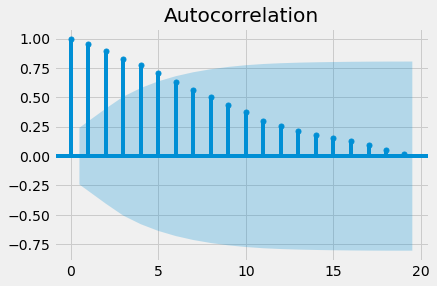

In [71]:
plot_acf(resampled['Close']);

In [72]:
resampled.shape

(66, 8)

In [73]:
train = resampled.iloc[:54]

In [74]:
test = resampled.iloc[54:]

In [75]:
model = SARIMAX(train['Close'], order=model_order)

In [76]:
results = model.fit()

In [77]:
start = len(train)

In [78]:
end = len(train) + len(test) - 1

In [79]:
predictions = results.predict(start=start, end=end, typ='levels').rename('SARIMA Predictions')
print(predictions)

2020-07-31    89.822095
2020-08-31    89.259914
2020-09-30    86.999794
2020-10-31    84.382392
2020-11-30    82.856909
2020-12-31    83.184438
2021-01-31    85.067449
2021-02-28    87.379928
2021-03-31    88.834191
2021-04-30    88.692938
2021-05-31    87.135652
2021-06-30    85.101895
Freq: M, Name: SARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Date'>

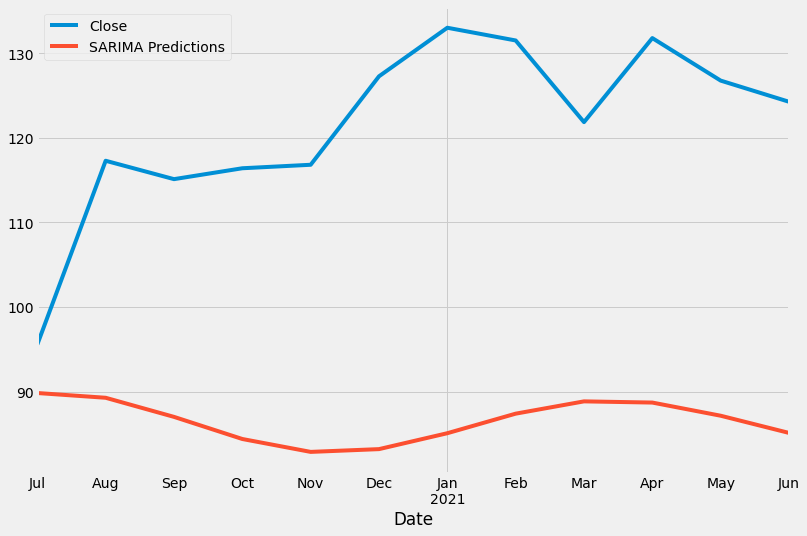

In [80]:
test['Close'].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

In [81]:
error = rmse(test['Close'], predictions)

In [82]:
test['Close'].mean()

121.48645553530388

In [83]:
error

36.5645602523666

In [84]:
model_2 = SARIMAX(resampled['Close'], order=model_order)
results_2 = model_2.fit()

In [85]:
fcast_2 = results_2.predict(len(resampled), len(resampled)+11, typ='levels').rename('SARIMA Forecast')

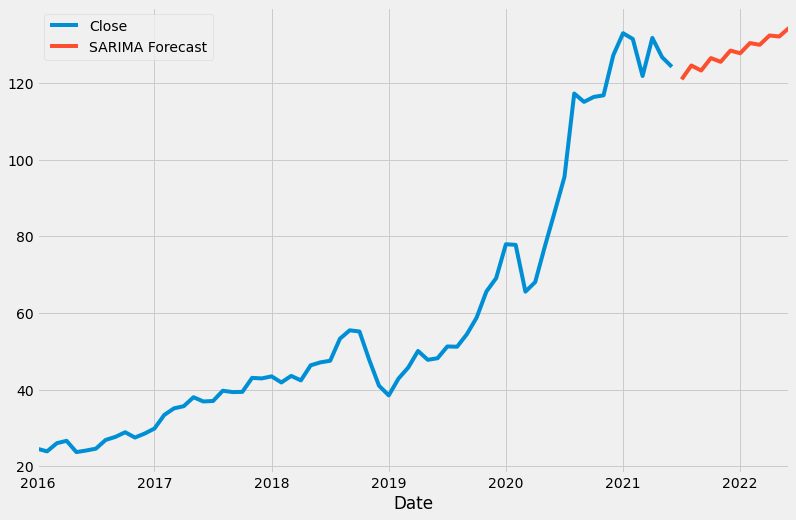

In [86]:
resampled['Close'].plot(legend=True, figsize=(12,8))
fcast_2.plot(legend=True);

### SARIMA Model B

In [87]:
stepwise_fit = auto_arima(apple['Close'])
model_order = stepwise_fit.order
model_order

(2, 1, 3)

In [88]:
apple.shape

(1362, 9)

In [89]:
train_b = apple.iloc[:997]
test_b = apple.iloc[997:]

In [90]:
model_b = SARIMAX(train_b['Close'], order=model_order)

In [91]:
results_b = model_b.fit()

In [92]:
start_b = len(train_b)
end_b = len(train_b) + len(test_b) - 1

In [93]:
predictions_b = results_b.predict(start=start_b, end=end_b, typ='levels').rename('SARIMA Predictions')
print(predictions_b)

997     70.111273
998     70.172163
999     70.267441
1000    70.365812
1001    70.440624
          ...    
1357    70.341747
1358    70.341747
1359    70.341747
1360    70.341747
1361    70.341747
Name: SARIMA Predictions, Length: 365, dtype: float64


<AxesSubplot:xlabel='Date'>

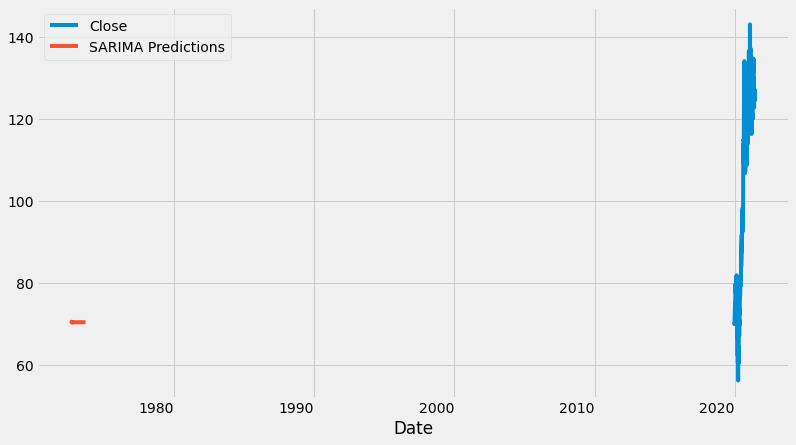

In [94]:
test_b['Close'].plot(legend=True, figsize=(12,8))
predictions_b.plot(legend=True)

### RNN Models

In [95]:
resampled.shape

(66, 8)

In [96]:
train.shape

(54, 8)

In [97]:
test.shape

(12, 8)

In [98]:
scaler = MinMaxScaler()

In [99]:
scaler.fit(train[['Close']])

MinMaxScaler()

In [100]:
scaled_train = scaler.transform(train[['Close']])
scaled_test = scaler.transform(test[['Close']])

In [101]:
n_input = 2
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [102]:
len(scaled_train)

54

In [103]:
scaled_train[:5]

array([[0.01377093],
       [0.00307672],
       [0.03704681],
       [0.04690113],
       [0.        ]])

In [104]:
X,y = generator[0]

In [105]:
X

array([[[0.01377093],
        [0.00307672]]])

In [106]:
y

array([[0.03704681]])

In [107]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [108]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit_generator(train_generator, epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0300
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 3/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 4/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 5/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0153
Epoch 6/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0121
Epoch 7/20
42/42 [==============================] - 1s 16ms/step - loss: 0.0117
Epoch 8/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0134
Epoch 9/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 10/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 11/20
42/42 [==============================] - 1s 15ms/step - loss: 0.0145
Epoch 12/20
42/42 [=========================

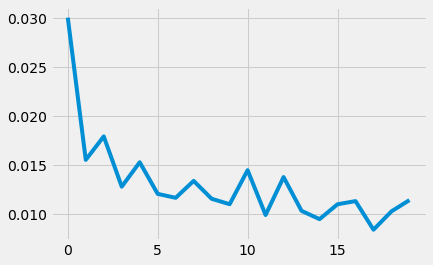

In [111]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])

In [112]:
first_eval_batch = scaled_train[-12:]

In [113]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [114]:
model.predict(first_eval_batch)

array([[0.9643735]], dtype=float32)

### RNN Forecast

In [115]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [116]:
test_predictions

[array([0.9643735], dtype=float32),
 array([1.026482], dtype=float32),
 array([1.0988833], dtype=float32),
 array([1.1807612], dtype=float32),
 array([1.2736549], dtype=float32),
 array([1.3783967], dtype=float32),
 array([1.5012914], dtype=float32),
 array([1.6455837], dtype=float32),
 array([1.8248558], dtype=float32),
 array([2.0620117], dtype=float32),
 array([2.3699336], dtype=float32),
 array([2.7773168], dtype=float32)]

In [117]:
true_predictions = scaler.inverse_transform(test_predictions)

In [118]:
true_predictions

array([[ 84.21752893],
       [ 88.11221983],
       [ 92.65235236],
       [ 97.78674644],
       [103.61191649],
       [110.18005552],
       [117.88652058],
       [126.93479108],
       [138.17656516],
       [153.04811445],
       [172.35724922],
       [197.90339429]])

In [119]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Date'>

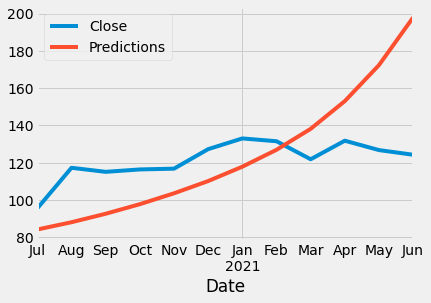

In [120]:
test['Close'].plot(legend=True)
test['Predictions'].plot(legend=True)

### RNN Model B 

In [121]:
apple.shape

(1362, 9)

In [122]:
aapl_train = apple.iloc[:997]
aapl_test = apple.iloc[997:]

In [123]:
scaler_b = MinMaxScaler()
scaler_b.fit(aapl_train[['Close']])

MinMaxScaler()

In [124]:
scaled_train_a = scaler_b.transform(aapl_train[['Close']])
scaled_test_a = scaler_b.transform(aapl_test[['Close']])

In [125]:
n_input_b = 365
n_features_b = 1

generator = TimeseriesGenerator(scaled_train_a, scaled_train_a, length=n_input, batch_size=1)

In [126]:
model_b = Sequential()

model_b.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model_b.add(Dense(1))
model_b.compile(optimizer='adam', loss='mse')

In [127]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [128]:
model_b.fit_generator(train_generator, epochs=30)

Epoch 1/30
42/42 [==============================] - 0s 9ms/step - loss: 0.0441
Epoch 2/30
42/42 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 3/30
42/42 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 4/30
42/42 [==============================] - 1s 14ms/step - loss: 0.0144
Epoch 5/30
42/42 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 6/30
42/42 [==============================] - 0s 11ms/step - loss: 0.0149
Epoch 7/30
42/42 [==============================] - 1s 12ms/step - loss: 0.0132
Epoch 8/30
42/42 [==============================] - 1s 12ms/step - loss: 0.0138
Epoch 9/30
42/42 [==============================] - 1s 14ms/step - loss: 0.0110
Epoch 10/30
42/42 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 11/30
42/42 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 12/30
42/42 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 13/30
42/42 [=======================

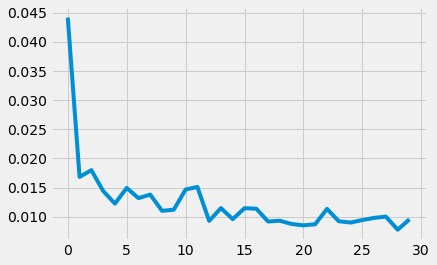

In [129]:
plt.plot(range(len(model_b.history.history['loss'])), model_b.history.history['loss'])

In [130]:
test_predictions_b = []
first_eval_batch_b = scaled_train_a[-n_input_b:]
current_batch_b = first_eval_batch_b.reshape((1, n_input_b, n_features_b))

for i in range(len(aapl_test)):
    
    current_pred_b = model_b.predict(current_batch_b)[0]
    
    test_predictions_b.append(current_pred_b)
    
    current_batch_b = np.append(current_batch_b[:,1:,:], [[current_pred_b]], axis=1)

In [131]:
true_predictions_b = scaler_b.inverse_transform(test_predictions_b)

ValueError: Input contains infinity or a value too large for dtype('float64').

### Facebook Prophet Model

In [ ]:
from fbprophet import Prophet

In [ ]:
apple_close = pd.DataFrame(apple['Close'])
apple_close.reset_index(inplace=True)

In [ ]:
apple_close.columns = ['ds', 'y']
apple_close.head()

In [ ]:
apple_close['ds'] = pd.to_datetime(apple_close['ds'])

In [ ]:
apple_close.info()

In [ ]:
apple_close.shape

In [ ]:
train_c = apple_close[:997]
test_c = apple_close[997:]

In [ ]:
apple_close[:997]

In [ ]:
m = Prophet()
m.fit(train_c)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast.tail()

In [ ]:
test_c

In [ ]:
ax = forecast.plot(x='ds', y ='yhat', label='Predictions', legend=True, figsize=(12,8))
test_c.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2019-12-18', '2021-06-01'))

In [ ]:
rmse(forecast, test_c['y'])

In [ ]:
forecast.columns

In [ ]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

In [ ]:
m.plot(forecast);

In [ ]:
m.plot_components(forecast);